In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Importing Libraries and Loading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [3]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# Numerical Data Analysis

In [4]:
# how the data looks like?
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Checking for datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# checking rows and columns
train_df.shape

(8693, 14)

In [7]:
# checking for NaN values in training split
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
# checking for NaN values in test split
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
# checking for category split in different categories
categr = ['Transported' , 'HomePlanet','CryoSleep','Cabin','VIP']
for i in categr:
    print(train_df[i].value_counts())


True     4378
False    4315
Name: Transported, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64


In [10]:
# checking for correlation among the features
train_df.corr(numeric_only = True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [11]:
# Looking at the data mathematically
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
# checking for duplicated values
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

# Exploratory Data Analysis

<Axes: >

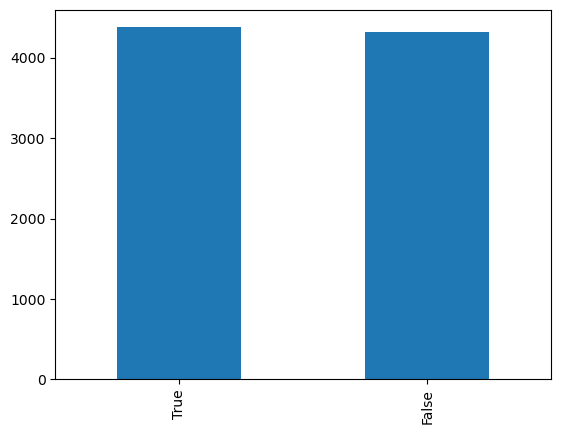

In [13]:
train_df['Transported'].value_counts().plot(kind='bar')

<Axes: >

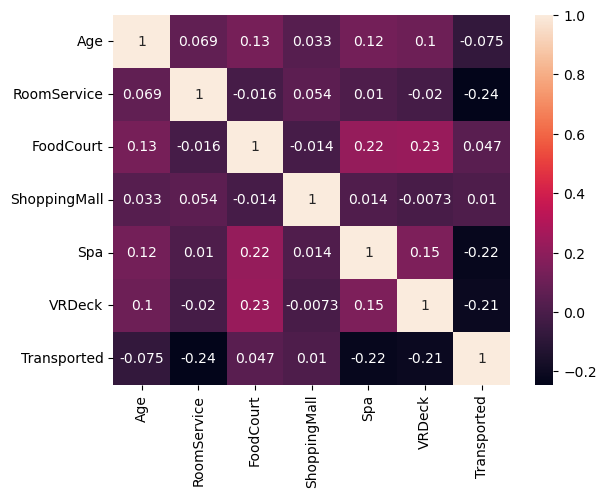

In [14]:
sns.heatmap(train_df.corr(numeric_only = True), annot = True)

<Axes: xlabel='Age', ylabel='Count'>

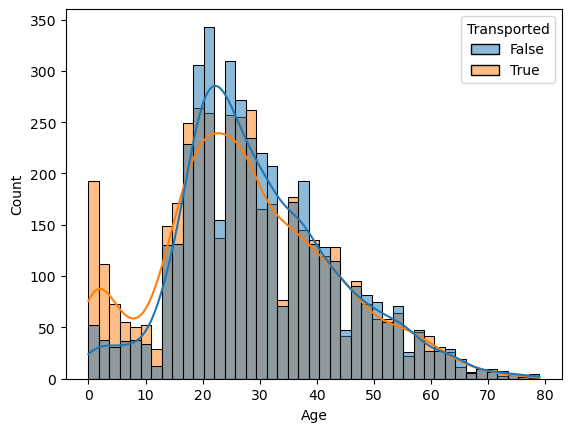

In [15]:
sns.histplot(data=train_df, x='Age', hue='Transported', kde=True)

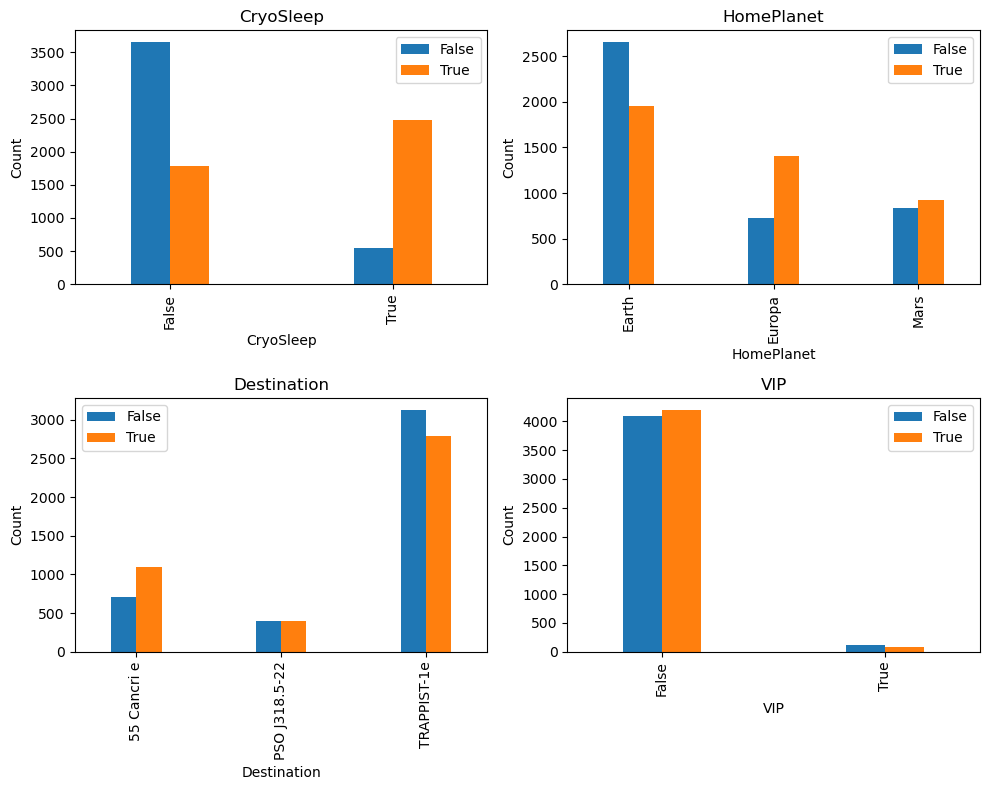

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Group the data by 'Transported' and count the occurrences for each variable
grouped_data_cryosleep = train_df.groupby(['CryoSleep', 'Transported']).size().unstack()
grouped_data_homeplanet = train_df.groupby(['HomePlanet', 'Transported']).size().unstack()
grouped_data_destination = train_df.groupby(['Destination', 'Transported']).size().unstack()
grouped_data_vip = train_df.groupby(['VIP', 'Transported']).size().unstack()

grouped_data_cryosleep.plot(kind='bar', width=0.35, ax=axes[0][0])
axes[0,0].set_title('CryoSleep')
axes[0,0].set_xlabel('CryoSleep')
axes[0,0].set_ylabel('Count')
axes[0,0].legend()

grouped_data_homeplanet.plot(kind='bar', width=0.35, ax=axes[0][1])
axes[0,1].set_title('HomePlanet')
axes[0,1].set_xlabel('HomePlanet')
axes[0,1].set_ylabel('Count')
axes[0,1].legend()

grouped_data_destination.plot(kind='bar', width=0.35, ax=axes[1][0])
axes[1,0].set_title('Destination')
axes[1,0].set_xlabel('Destination')
axes[1,0].set_ylabel('Count')
axes[1,0].legend()

grouped_data_vip.plot(kind='bar', width=0.35, ax=axes[1][1])
axes[1,1].set_title('VIP')
axes[1,1].set_xlabel('VIP')
axes[1,1].set_ylabel('Count')
axes[1,1].legend()

plt.tight_layout()
plt.show()

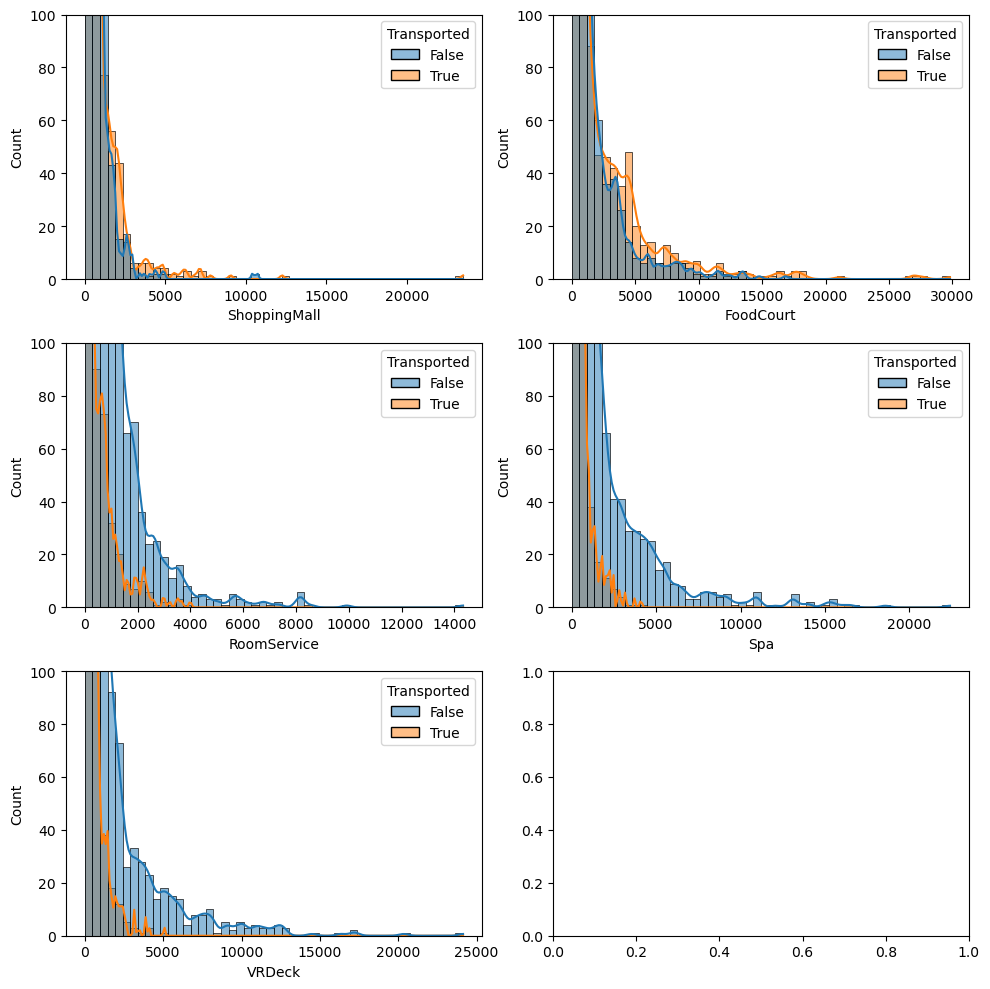

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck']

for i, col in enumerate(num_cols):
    sns.histplot(data=train_df, x=col, ax=axes[i], kde=True, bins=50, hue='Transported')
    axes[i].set_ylim([0, 100])
    
plt.tight_layout()

In [18]:
ex_level = train_df['HomePlanet'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Home Planet')
fig.show()

In [19]:
ex_level = train_df['Destination'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Destination')
fig.show()

In [20]:
px.box(train_df, x = 'Transported', y = 'Age')

# Data Pre Processing

In [21]:
#for easier use let's change all column abmes to lowercase
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [22]:
# The first option of passengerid tells us about the group. Let's create a new feature with that
train_df['group'] = train_df['passengerid'].apply(lambda x : x.split('_')[0])
test_df['group'] = test_df['passengerid'].apply(lambda x : x.split('_')[0])

In [23]:
# Similarly , Let's extract a new feature for number of members in a group of the passenger
train_df['groupsize'] = train_df['group'].apply(lambda x : train_df['group'].value_counts()[x])
test_df['groupsize'] = test_df['group'].apply(lambda x : test_df['group'].value_counts()[x])

In [24]:
# Let's create a label column if the person is travelling solo or not as it has a high impact on transportation
train_df['solo'] = train_df['groupsize'].apply(lambda x : 1 if x == 1 else 0)
test_df['solo'] = test_df['groupsize'].apply(lambda x : 1 if x == 1 else 0)

In [25]:
# Just looking at the data to figure out what to do next
train_df['cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: cabin, dtype: object

In [26]:
# Let's extract three different features from cabin number as the location in ship is very impactful
def deck(x):
    try:
        return x.split('/')[0]
    except:
        pass

def num(x):
    try:
        return int(x.split('/')[1])
    except:
        pass

def side(x):
    try:
        return x.split('/')[2]
    except:
        pass

train_df['cabin_deck'] = train_df['cabin'].apply(deck)
train_df['cabin_num'] = train_df['cabin'].apply(num)
train_df['cabin_side'] = train_df['cabin'].apply(side)

test_df['cabin_deck'] = test_df['cabin'].apply(deck)
test_df['cabin_num'] = test_df['cabin'].apply(num)
test_df['cabin_side'] = test_df['cabin'].apply(side)

In [27]:
# Again looking at the data
train_df

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,group,groupsize,solo,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,1,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,1,A,98.0,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,1,G,1499.0,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,1,G,1500.0,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,0,E,608.0,S


In [28]:
# Let's create a new column about total spending of a person on the spaceship
train_df['spending'] = train_df[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']].sum(axis=1)
test_df['spending'] = test_df[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']].sum(axis=1)

In [29]:
# Let's join the train and test dataset temporarily for ease in imputing the NaN values
# extra temporary feature to split them back easily
train_df['train'] = 'Yes'
test_df['train'] = 'No'
df = pd.concat([train_df, test_df]).reset_index(drop=True)

In [30]:
# looking for total null values now
df.isnull().sum()

passengerid        0
homeplanet       288
cryosleep        310
cabin            299
destination      274
age              270
vip              296
roomservice      263
foodcourt        289
shoppingmall     306
spa              284
vrdeck           268
name             294
transported     4277
group              0
groupsize          0
solo               0
cabin_deck       299
cabin_num        299
cabin_side       299
spending           0
train              0
dtype: int64

In [31]:
# Let's look at the median for numerical columns
df[['age', 'roomservice','foodcourt','shoppingmall','spa','vrdeck']].median()

age             27.0
roomservice      0.0
foodcourt        0.0
shoppingmall     0.0
spa              0.0
vrdeck           0.0
dtype: float64

In [32]:
# Imputing the NaN values with median imputation
df[['roomservice','foodcourt','shoppingmall','spa','vrdeck']] = df[['roomservice','foodcourt','shoppingmall','spa','vrdeck']].fillna(0)
df['age'] = df['age'].fillna(df['age'].median())

In [33]:
# checking for category split in different categories to undergo value imputation
categr = ['vip','homeplanet','destination','cryosleep','cabin_deck','cabin_num','cabin_side']
for i in categr:
    print(train_df[i].value_counts())

False    8291
True      199
Name: vip, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64
False    5439
True     3037
Name: cryosleep, dtype: int64
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: cabin_deck, dtype: int64
82.0      28
86.0      22
19.0      22
56.0      21
176.0     21
          ..
1644.0     1
1515.0     1
1639.0     1
1277.0     1
1894.0     1
Name: cabin_num, Length: 1817, dtype: int64
S    4288
P    4206
Name: cabin_side, dtype: int64


In [34]:
# Imputing null values
df['vip'] = df['vip'].fillna(False)
df['homeplanet'] = df['homeplanet'].fillna('Mars')
df['destination'] = df['destination'].fillna("'TRAPPIST-1e")
df['cryosleep'] = df['cryosleep'].fillna(False)
df['cabin_deck'] = df['cabin_deck'].fillna('T')
df['cabin_num'] = df['cabin_num'].fillna('0')
df['cabin_side'] = df['cabin_side'].fillna('P')

In [35]:
# creating a new label column about age groups of the people onboard
df['agegroup'] = pd.cut(df.age, bins=[-1, 5, 13, 18, 60, 100], labels = ['Baby', 'Child', 'Teen', 'Adult', 'Elderly'])
df

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,...,transported,group,groupsize,solo,cabin_deck,cabin_num,cabin_side,spending,train,agegroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,1,1,B,0.0,P,0.0,Yes,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,1,1,F,0.0,S,736.0,Yes,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,2,0,A,0.0,S,10383.0,Yes,Adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,2,0,A,0.0,S,5176.0,Yes,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,1,1,F,1.0,S,1091.0,Yes,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,NaN,9266,2,0,G,1496.0,S,0.0,No,Adult
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,NaN,9269,1,1,T,0,P,1018.0,No,Adult
12967,9271_01,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,...,NaN,9271,1,1,D,296.0,P,0.0,No,Adult
12968,9273_01,Europa,False,D/297/P,'TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,...,NaN,9273,1,1,D,297.0,P,3203.0,No,Adult


In [36]:
# dropping these columns as we've already extracted useful columns from them
df = df.drop(['name', 'cabin', 'group'],axis=1)
df

,passengerid,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,groupsize,solo,cabin_deck,cabin_num,cabin_side,spending,train,agegroup
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0.0,P,0.0,Yes,Adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1,F,0.0,S,736.0,Yes,Adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,0,A,0.0,S,10383.0,Yes,Adult
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,0,A,0.0,S,5176.0,Yes,Adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,F,1.0,S,1091.0,Yes,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,2,0,G,1496.0,S,0.0,No,Adult
12966,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,1,1,T,0,P,1018.0,No,Adult
12967,9271_01,Mars,True,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,NaN,1,1,D,296.0,P,0.0,No,Adult
12968,9273_01,Europa,False,'TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,0.0,523.0,NaN,1,1,D,297.0,P,3203.0,No,Adult


In [37]:
df.isnull().sum()

passengerid        0
homeplanet         0
cryosleep          0
destination        0
age                0
vip                0
roomservice        0
foodcourt          0
shoppingmall       0
spa                0
vrdeck             0
transported     4277
groupsize          0
solo               0
cabin_deck         0
cabin_num          0
cabin_side         0
spending           0
train              0
agegroup           0
dtype: int64

In [38]:
# No Null Values Yayyy!
# The transported NaN values are what we'll be predicting

# Encoding Categorical Data

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categorical_cols= ['homeplanet','cryosleep','destination','vip','cabin_deck','cabin_side','cabin_num', 'agegroup']
for i in categorical_cols:
    le=LabelEncoder()
    arr = np.array(df[i]).astype(str)
    le.fit(arr)
    df[i]=le.transform(df[i].astype(str))

In [40]:
# splitting back the database into test and train as we've already imputed the values
df_train = df[df['passengerid'].isin(train_df['passengerid']).values == True]
df_test = df[df['passengerid'].isin(test_df['passengerid']).values == True].drop('transported', axis=1)

In [41]:
# setting the passengerid column as index as we'll need it later for predictions
df.set_index('passengerid',inplace=True)

In [42]:
# dropping the temporary column we created while joining train and test data
df_train = df[df['train'] == 'Yes']
df_train.drop('train', axis=1, inplace=True)
df_train

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,groupsize,solo,cabin_deck,cabin_num,cabin_side,spending,agegroup
passengerid,,,,,,,,,,,,,,,,,,
0001_01,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,1,1,1,0,0.0,0
0002_01,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1,5,1,1,736.0,0
0003_01,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,0,0,1,1,10383.0,0
0003_02,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,0,0,1,1,5176.0,0
0004_01,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1,5,2,1,1091.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,1,1,0,1873,0,8536.0,0
9278_01,0,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1,1,6,557,1,0.0,4
9279_01,0,0,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1,1,6,560,1,1873.0,0


In [43]:
df_test = df[df['train'] == 'No']
df_test.drop('train', axis=1, inplace=True)
df_test

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,groupsize,solo,cabin_deck,cabin_num,cabin_side,spending,agegroup
passengerid,,,,,,,,,,,,,,,,,,
0013_01,0,1,3,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,6,1118,1,0.0,0
0018_01,0,0,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,NaN,1,1,5,1229,1,2832.0,0
0019_01,1,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,2,1,1,0.0,0
0021_01,1,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,NaN,1,1,2,2,1,7418.0,0
0023_01,0,0,3,20.0,0,10.0,0.0,635.0,0.0,0.0,NaN,1,1,5,1340,1,645.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0,1,3,34.0,0,0.0,0.0,0.0,0.0,0.0,NaN,2,0,6,554,1,0.0,0
9269_01,0,0,3,42.0,0,0.0,847.0,17.0,10.0,144.0,NaN,1,1,7,0,0,1018.0,0
9271_01,2,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,1,3,1114,0,0.0,0


In [44]:
# Label encoding the target variable
df_train['transported'] = df_train['transported'].replace({True:1,False:0})
df_train

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,groupsize,solo,cabin_deck,cabin_num,cabin_side,spending,agegroup
passengerid,,,,,,,,,,,,,,,,,,
0001_01,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,0,0.0,0
0002_01,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,1,5,1,1,736.0,0
0003_01,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,2,0,0,1,1,10383.0,0
0003_02,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,0,0,1,1,5176.0,0
0004_01,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,5,2,1,1091.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,1,0,1873,0,8536.0,0
9278_01,0,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,6,557,1,0.0,4
9279_01,0,0,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,1,6,560,1,1873.0,0


In [45]:
# splitting the train data into x and y for training models
X = df_train.drop('transported',axis=1)
y = df_train['transported']

In [46]:
# splitting into train and test data to evaluate models before moving onto competition test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression

In [47]:
# importing and implementing logistic regression
from sklearn.linear_model import LogisticRegression
lre = LogisticRegression()
lre.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
# predicting and evaluating the test values
lg_pred_y = lre.predict(X_test)
print(accuracy_score(y_test.values, lg_pred_y))

0.8004600345025877


# Decision Trees

In [49]:
# importing and implementing decision trees
from sklearn import tree
dtr = tree.DecisionTreeClassifier()
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
dt_pred_y = dtr.predict(X_test)
print(accuracy_score(y_test.values, dt_pred_y))

0.7441058079355952


# SVM

In [51]:
# importing and implementing SVMs
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train,y_train)

SVC()

In [52]:
sv_pred_y = sv.predict(X_test)
print(accuracy_score(y_test.values, sv_pred_y))

0.7981598619896493


# KNN

In [53]:
# importing library and implementing knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
knn_pred_y = knn.predict(X_test)
print(accuracy_score(y_test.values, knn_pred_y))

0.772857964347326


# Gradient Boosting

In [55]:
# importing and implementing gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
gbc_pred_y = gbc.predict(X_test)
print(accuracy_score(y_test.values, gbc_pred_y))

0.8073605520414031


# Cat Boost

In [57]:
!pip install catboost
import catboost

In [58]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=1500,
                         eval_metric='Accuracy',
                        verbose=0)

In [59]:
cat.fit(X_train,y_train)

In [60]:
pred_y = cat.predict(X_test)
print(accuracy_score(y_test.values, pred_y))

0.8223116733755031


In [61]:
cat.fit(X,y)

In [62]:
y_pred = cat.predict(df_test)

In [63]:
sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)
sub.reset_index(inplace=True)
sub.head()

,passengerid,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [64]:
sub.to_csv('submissionnnn_bad.csv', index=False)
# although this model gives better accuracy here but it reduces when submitted to the competition
# hypertuned models gave better results

# HyperTuning ( Ensembling )

In [65]:
# importing and creating grid search variable and set it for our use case
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(200,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},cv=3)

In [66]:
# training model
gcv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x79285c4eb100>,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': range(200, 2000, 200), 'verbose': [0]})

In [67]:
pred_y=gcv.predict(X_test)

In [68]:
print(accuracy_score(y_test.values,pred_y))

0.8228867165037378


In [69]:
gcv.fit(X,y)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x79285c4eb100>,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': range(200, 2000, 200), 'verbose': [0]})

In [70]:
y_pred = gcv.predict(df_test)

In [71]:
sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)
sub.reset_index(inplace=True)
sub.head()

,passengerid,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [72]:
sub.to_csv('submission.csv', index=False)

In [73]:
# These Predictions have an accuracy of 0.81084 and has placed me 228 on the competition leaderboard